In [179]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
df = pd.read_csv(
    'raw data/Twitter_big/training_set_tweets_processed.csv',
    low_memory=False,
    encoding='utf-8',
    lineterminator='\n'
)
df.index = pd.to_datetime(df['datetime'])

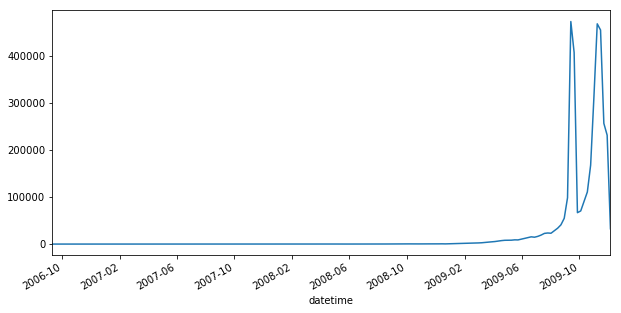

In [154]:
fig, ax = plt.subplots(figsize=(10, 5))
df['compound'].resample('7d').apply(len).plot(ax=ax)

In [165]:
def confidence_interval(time_series, scale, alpha = .05, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10,5))
    mean = time_series.resample(scale).apply(np.mean)
    var = time_series.resample(scale).apply(np.var)
    n = time_series.resample(scale).apply(len)
    sigmn = np.sqrt(var) / np.sqrt(n)
    q = stats.t.ppf(1-alpha/2, n-1)
    upper = mean + q * sigmn
    lower = mean - q * sigmn
    ax.fill_between(mean.index, upper, lower, alpha = .5)
    time_series.resample(scale).apply(np.mean).plot(ax=ax)

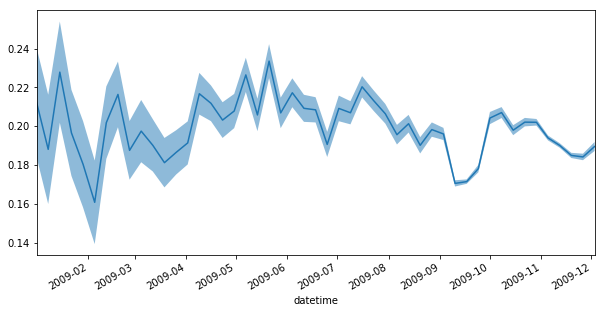

In [166]:
confidence_interval(df['compound']['2009'], '7D')

In [155]:
sorted_users = df['2009'].groupby('id1').apply(len).reset_index().sort_values(0, ascending=False)
top_users = sorted_users.head(100)

In [156]:
top_sentiment = df[df['id1'].astype(str).isin(top_users['id1'].astype(str))]

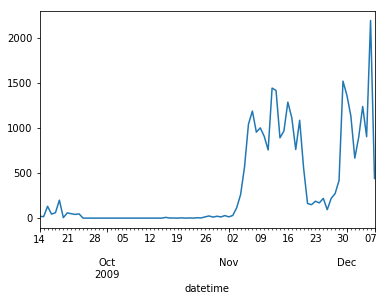

In [157]:
top_sentiment['compound']['2009'].resample('1D').apply(len).plot()

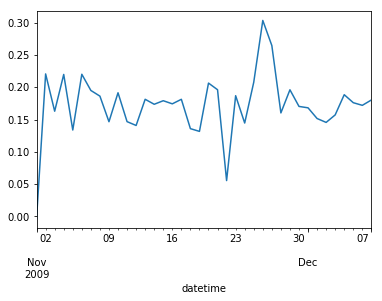

In [158]:
top_sentiment['compound']['2009-11':'2009-12'].resample('1D').apply(np.mean).plot()

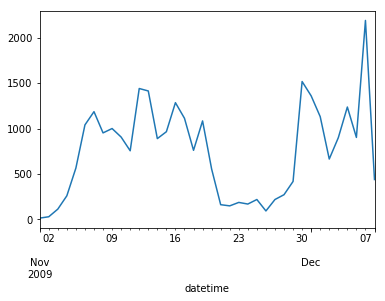

In [159]:
top_sentiment['compound']['2009-11':'2009-12'].resample('1D').apply(len).plot()

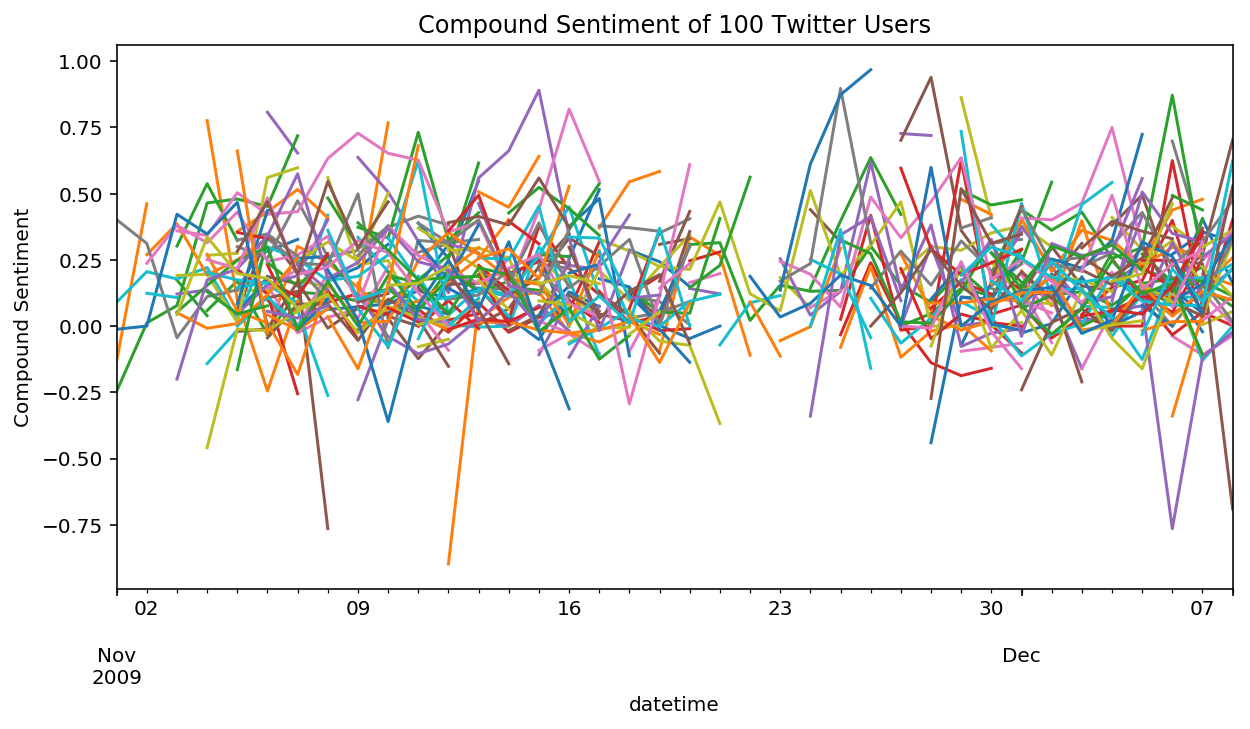

In [182]:
fig, ax = plt.subplots(figsize = (10,5))
for user in top_users['id1']:
    user_df = df[df['id1'].astype(str) == str(user)]
    user_df['compound']['2009-11':'2009-12'].resample('1D').apply(np.mean).plot(ax=ax)
ax.set_title('Compound Sentiment of 100 Twitter Users')
ax.set_ylabel('Compound Sentiment')

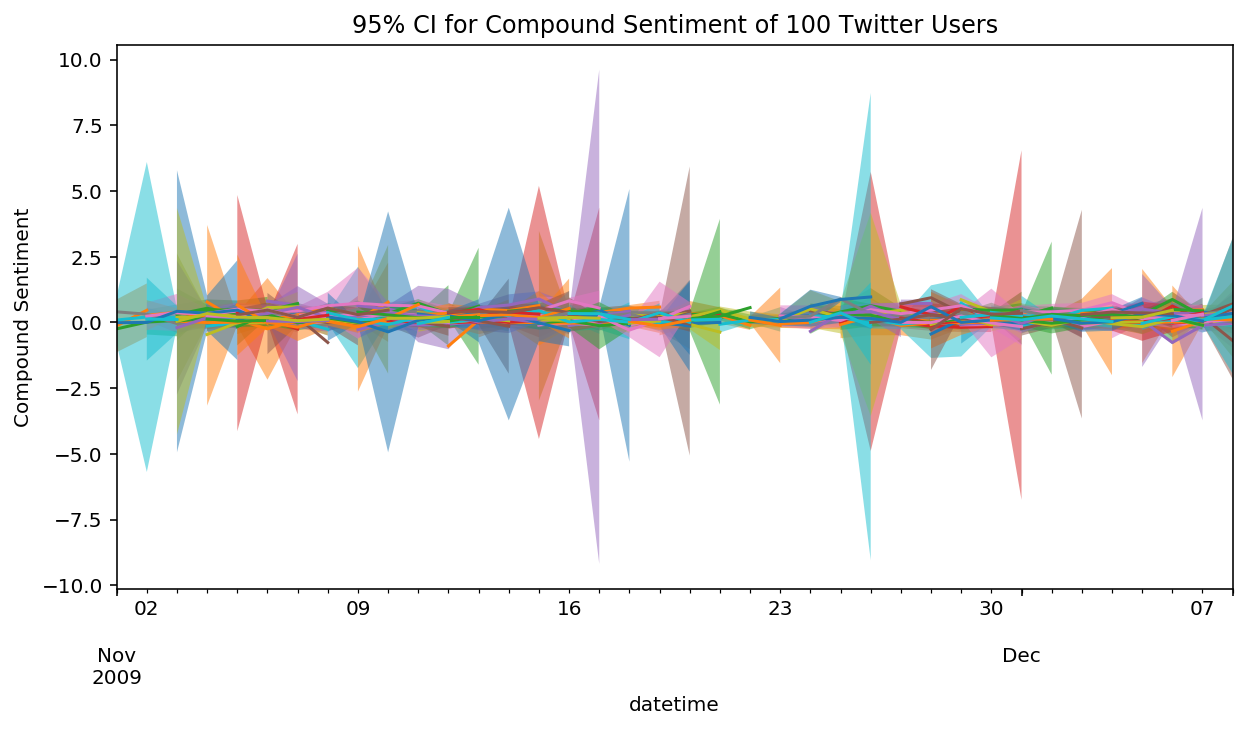

In [181]:
fig, ax = plt.subplots(figsize = (10,5))
for user in top_users['id1']:
    user_df = df[df['id1'].astype(str) == str(user)]
    confidence_interval(user_df['compound']['2009-11':'2009-12'], '1D', alpha = .05, ax=ax)
ax.set_title('95% CI for Compound Sentiment of 100 Twitter Users')
ax.set_ylabel('Compound Sentiment')

In [116]:
extreme_and_active = top_sentiment.groupby('id1')['compound'].mean().sort_values(ascending=False)
activepos_users = extreme_and_active.head(1000).index
activeneg_users = extreme_and_active.tail(1000).index

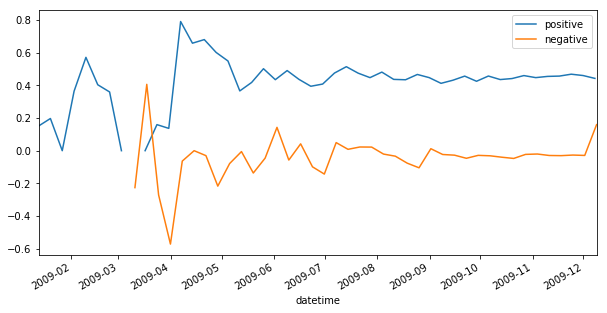

In [170]:
fig, ax = plt.subplots(figsize = (10,5))

activepos_users_sentiment = df[df['id1'].astype(str).isin(activepos_users.astype(str))]
activepos_users_sentiment['compound']['2009'].resample('7D').apply(np.mean).plot(ax=ax, label = 'positive')

activeneg_users_sentiment = df[df['id1'].astype(str).isin(activeneg_users.astype(str))]
activeneg_users_sentiment['compound']['2009'].resample('7D').apply(np.mean).plot(ax=ax, label = 'negative')
ax.legend()

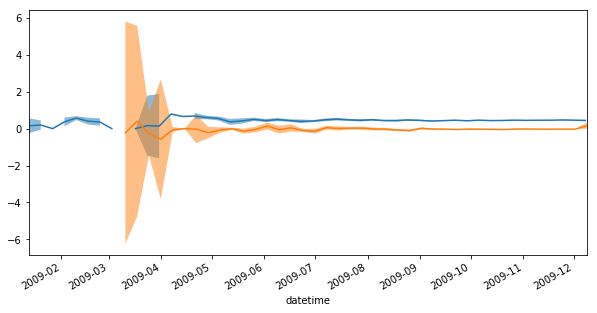

In [168]:
fig, ax = plt.subplots(figsize = (10,5))

activepos_users_sentiment = df[df['id1'].astype(str).isin(activepos_users.astype(str))]
confidence_interval(activepos_users_sentiment['compound']['2009'], '7D', ax=ax)

activeneg_users_sentiment = df[df['id1'].astype(str).isin(activeneg_users.astype(str))]
confidence_interval(activeneg_users_sentiment['compound']['2009'], '7D', ax=ax)

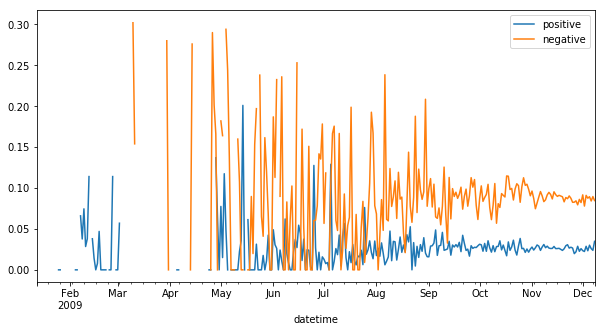

In [126]:
fig, ax = plt.subplots(figsize = (10,5))

activepos_users_sentiment = df[df['id1'].astype(str).isin(activepos_users.astype(str))]
activepos_users_sentiment['neg']['2009'].resample('1D').apply(np.mean).plot(ax=ax, label = 'positive')

activeneg_users_sentiment = df[df['id1'].astype(str).isin(activeneg_users.astype(str))]
activeneg_users_sentiment['neg']['2009'].resample('1D').apply(np.mean).plot(ax=ax, label = 'negative')
ax.legend()

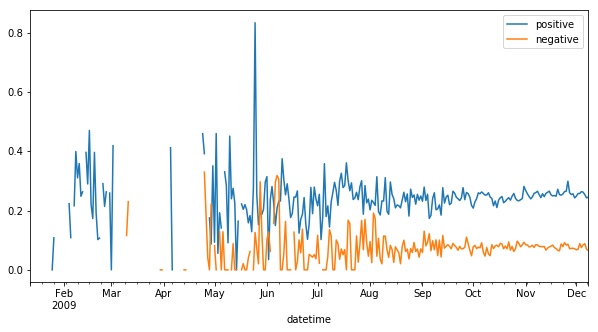

In [128]:
fig, ax = plt.subplots(figsize = (10,5))

activepos_users_sentiment = df[df['id1'].astype(str).isin(activepos_users.astype(str))]
activepos_users_sentiment['pos']['2009'].resample('1D').apply(np.mean).plot(ax=ax, label = 'positive')

activeneg_users_sentiment = df[df['id1'].astype(str).isin(activeneg_users.astype(str))]
activeneg_users_sentiment['pos']['2009'].resample('1D').apply(np.mean).plot(ax=ax, label = 'negative')
ax.legend()

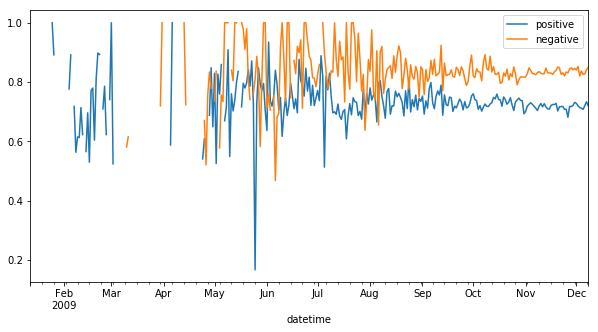

In [127]:
fig, ax = plt.subplots(figsize = (10,5))

activepos_users_sentiment = df[df['id1'].astype(str).isin(activepos_users.astype(str))]
activepos_users_sentiment['neu']['2009'].resample('1D').apply(np.mean).plot(ax=ax, label = 'positive')

activeneg_users_sentiment = df[df['id1'].astype(str).isin(activeneg_users.astype(str))]
activeneg_users_sentiment['neu']['2009'].resample('1D').apply(np.mean).plot(ax=ax, label = 'negative')
ax.legend()

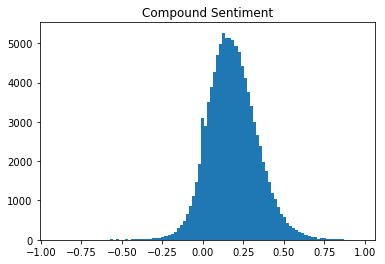

In [132]:
plt.hist(df.groupby('id1')['compound'].mean(), bins = 100)
plt.title('Compound Sentiment')

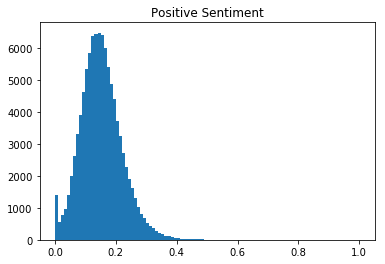

In [138]:
plt.hist(df.groupby('id1')['pos'].mean(), bins = 100)
plt.title('Positive Sentiment')

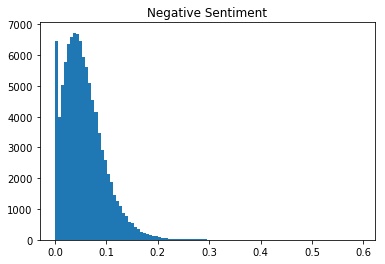

In [136]:
plt.hist(df.groupby('id1')['neg'].mean(), bins = 100)
plt.title('Negative Sentiment')

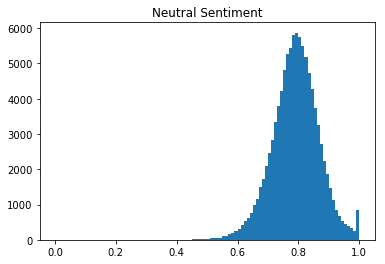

In [137]:
plt.hist(df.groupby('id1')['neu'].mean(), bins = 100)
plt.title('Neutral Sentiment')

In [184]:
sorted_users = df['2009'].groupby('id1').apply(len).reset_index().sort_values(0, ascending=False)

In [238]:
valence = df['2009'].groupby('id1')['compound'].apply(np.mean)
valence.columns = ['valence']
activity = df['2009'].groupby('id1')['compound'].apply(len)
activity.columns = ['activity']

In [239]:
val_act = pd.concat((valence, activity), axis=1)
val_act.columns = ['valence', 'activity']

In [240]:
val_act.head()

,valence,activity
id1,,
,0.00000,1
,0.00000,2
,0.00000,1
10002452,0.22182,20
10004832,0.24545,40


In [241]:
mn = val_act['valence'].min()
mx = val_act['valence'].max()
nbins = 100
width = (mx-mn)/nbins

binned = val_act.groupby(pd.cut(val_act['valence'], np.arange(mn, mx, width))).apply(np.mean)
binned.head()

,valence,activity
valence,,
"(-0.913, -0.894]",-0.902200,1.0
"(-0.894, -0.876]",NaN,NaN
"(-0.876, -0.857]",-0.873125,20.0
"(-0.857, -0.838]",NaN,NaN
"(-0.838, -0.819]",NaN,NaN


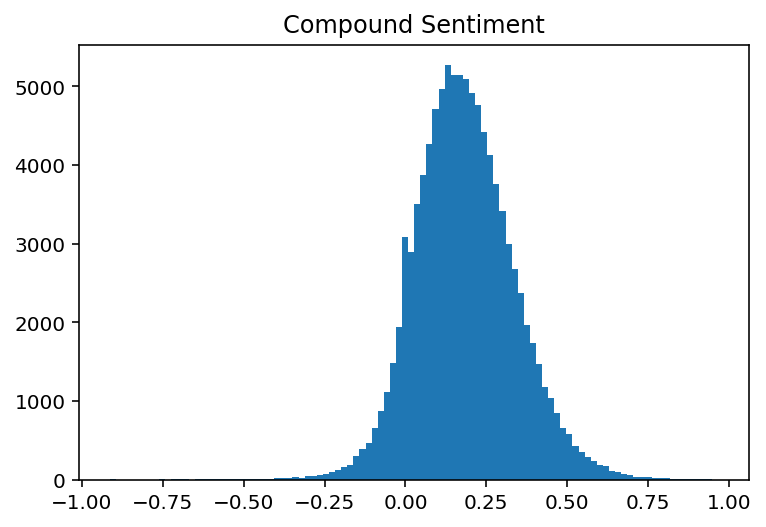

In [245]:
plt.hist(df.groupby('id1')['compound'].mean(), bins = 100)
plt.title('Compound Sentiment')

<Container object of 99 artists>

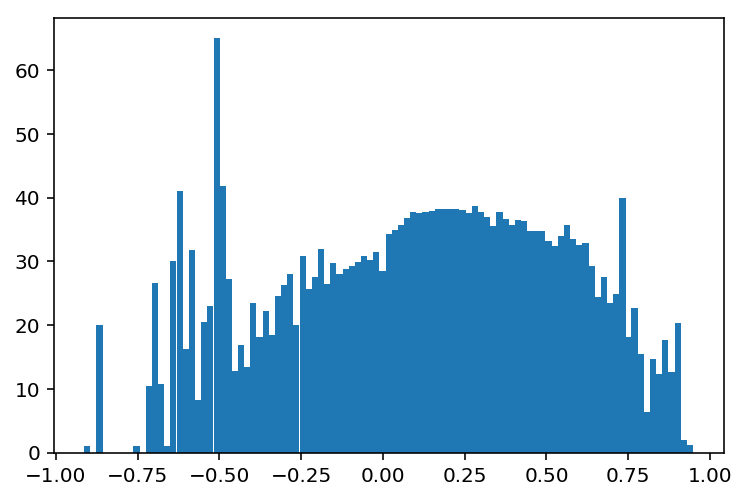

In [243]:
plt.bar([index.mid for index in binned.index], binned['activity'], width = width)